# **Machine Learning Course Project Phase 3 - Final**

**Tahir Ahmed -
230200041**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_Parkinsons = pd.read_csv("/content/parkinsons_updrs.data")

In [3]:
print("\nDataset Info:")
df_Parkinsons.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float6

In [4]:
# checking for missing values
print("\nMissing Values:")
print(df_Parkinsons.isna().sum())


Missing Values:
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


In [5]:
target = 'total_UPDRS'
X = df_Parkinsons.drop(columns='total_UPDRS')
y = df_Parkinsons[target]

Train-test split (80-20)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Confirm scaling
print("\nScaled Training Data Shape:", X_train_scaled.shape)
print("Scaled Test Data Shape:", X_test_scaled.shape)


Scaled Training Data Shape: (4700, 21)
Scaled Test Data Shape: (1175, 21)


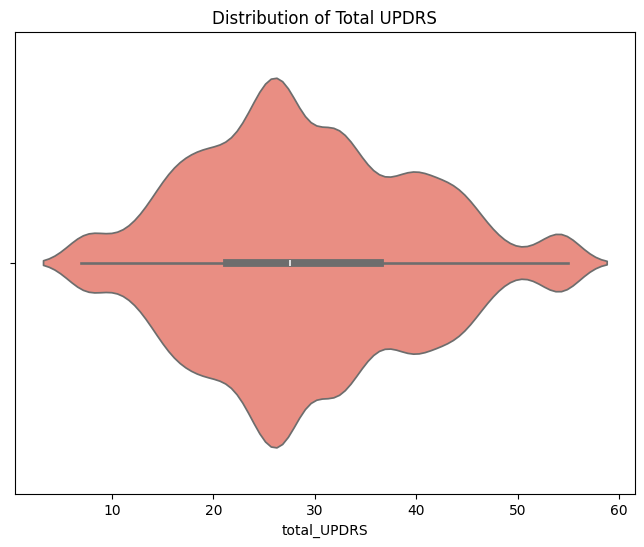

In [9]:
fig, axes = plt.subplots(figsize=(8, 6))
sns.violinplot(x=y, ax=axes, color='salmon')
axes.set_title("Violin Plot of Total UPDRS")
plt.title("Distribution of Total UPDRS")
plt.show()

# **Baseline Model - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linearRegression_scaled = LinearRegression()
linearRegression_scaled.fit(X_train_scaled, y_train)
r2_Score_scaled = linearRegression_scaled.score(X_test_scaled, y_test)
print("R^2 score with scaling is: ", r2_Score_scaled)

R^2 score with scaling is:  0.913810791884122


# **SVM with RBF Kernel - Coarse Search**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

print("\nRunning SVM (RBF Kernel) Coarse Hyperparameter Tuning...")


Running SVM (RBF Kernel) Coarse Hyperparameter Tuning...


In [ ]:
svm_reg = SVR(kernel='rbf')
hpt_rnd_svm_dict = {
    'C': np.logspace(-3, 3, 10),
    'gamma': np.logspace(-4, 1, 10)
}

In [ ]:
rnd_svm = RandomizedSearchCV(
    estimator=svm_reg,
    param_distributions=hpt_rnd_svm_dict,
    cv=5,
    n_iter=30,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [ ]:
rnd_svm.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'gamma': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01])},
                   random_state=42, verbose=1)

In [ ]:
best_params_svm = rnd_svm.best_params_
best_score_svm = rnd_svm.best_score_
print(f"\nBest Coarse Parameters for SVM (RBF Kernel): {best_params_svm}")
print(f"Best Coarse Score for SVM (RBF Kernel): {best_score_svm:.4f}")


Best Coarse Parameters for SVM (RBF Kernel): {'gamma': 0.21544346900318845, 'C': 1000.0}
Best Coarse Score for SVM (RBF Kernel): 0.9749


# **SVM with RBF Kernel - Fine Search**

In [ ]:
print("\nRunning SVM (RBF Kernel) Fine Hyperparameter Tuning...")


Running SVM (RBF Kernel) Fine Hyperparameter Tuning...


In [ ]:
svr_params_fine = {
    'C': [500, 750, 1000, 1250, 1500],
    'gamma': [0.1, 0.15, 0.2, 0.215, 0.25, 0.3]
}

fine_search_svr = GridSearchCV(
    estimator=svm_reg,
    param_grid=svr_params_fine,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [ ]:
fine_search_svr.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [500, 750, 1000, 1250, 1500],
                         'gamma': [0.1, 0.15, 0.2, 0.215, 0.25, 0.3]},
             verbose=1)

In [ ]:
best_params_fine_svr = fine_search_svr.best_params_
best_score_fine_svr = fine_search_svr.best_score_
print(f"Best Fine Parameters for SVM (RBF Kernel): {best_params_fine_svr}")
print(f"Best Fine Score for SVM (RBF Kernel): {best_score_fine_svr:.4f}")

Best Fine Parameters for SVM (RBF Kernel): {'C': 500, 'gamma': 0.1}
Best Fine Score for SVM (RBF Kernel): 0.9865


**Model Evaluation on Test Set**

In [ ]:
from sklearn.metrics import r2_score
best_svr_model = fine_search_svr.best_estimator_
y_pred_svr = best_svr_model.predict(X_test_scaled)
svr_r2 = r2_score(y_test, y_pred_svr)
print(f"Final R² Score for SVM (RBF Kernel) on Test Set: {svr_r2:.4f}")

Final R² Score for SVM (RBF Kernel) on Test Set: 0.9891


# **Random Forest - Coarse Search**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
print("Running Random Forest Coarse Hyperparameter Tuning...")

Running Random Forest Coarse Hyperparameter Tuning...


In [ ]:
rf_reg = RandomForestRegressor()

In [ ]:
hpt_rnd_rf_dict = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, 30, None]
}

In [ ]:
rnd_rf = RandomizedSearchCV(
    estimator=rf_reg,
    param_distributions=hpt_rnd_rf_dict,
    cv=5,
    n_iter=30,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [ ]:
rnd_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 30, None],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500]},
                   random_state=42, verbose=1)

In [ ]:
best_params_rf = rnd_rf.best_params_
best_score_rf = rnd_rf.best_score_
print(f"Best Coarse Parameters for Random Forest: {best_params_rf}")
print(f"Best Coarse Score for Random Forest: {best_score_rf:.4f}")

Best Coarse Parameters for Random Forest: {'n_estimators': 300, 'max_depth': 30}
Best Coarse Score for Random Forest: 0.9988


# **Random Forest - Fine Search**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Fine Parameter Ranges based on coarse results
rf_params_fine = {
    'n_estimators': [150, 175, 200, 225, 250],
    'max_depth': [10, 12, 15, 18, 20]
}

fine_search_rf = GridSearchCV(
    estimator=rf_reg,
    param_grid=rf_params_fine,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fitting the Model
fine_search_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 15, 18, 20],
                         'n_estimators': [150, 175, 200, 225, 250]},
             verbose=1)

In [ ]:
# Extracting the Best Parameters and Score
best_params_fine_rf = fine_search_rf.best_params_
best_score_fine_rf = fine_search_rf.best_score_
print(f"\nBest Fine Parameters for Random Forest: {best_params_fine_rf}")
print(f"Best Fine Cross-Validated Score for Random Forest: {best_score_fine_rf:.4f}")


Best Fine Parameters for Random Forest: {'max_depth': 15, 'n_estimators': 175}
Best Fine Cross-Validated Score for Random Forest: 0.9989


**Model Evaluation on Test Set**

In [ ]:
print("Evaluating Final Random Forest Model on Test Set...")
best_rf_model = fine_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Final R² Score for Random Forest on Test Set: {rf_r2:.4f}")

Evaluating Final Random Forest Model on Test Set...
Final R² Score for Random Forest on Test Set: 0.9992


# **AdaBoost - Coarse Search**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
print("Running AdaBoost Coarse Hyperparameter Tuning...")

Running AdaBoost Coarse Hyperparameter Tuning...


In [ ]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1))

In [ ]:
ada_params_coarse = {
    'n_estimators': np.arange(50, 501, 50),
    'learning_rate': np.linspace(0.01, 2, 20)
}

In [ ]:
rnd_ada = RandomizedSearchCV(
    estimator=ada_reg,
    param_distributions=ada_params_coarse,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [ ]:
rnd_ada.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1)),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.11473684, 0.21947368, 0.32421053, 0.42894737,
       0.53368421, 0.63842105, 0.74315789, 0.84789474, 0.95263158,
       1.05736842, 1.16210526, 1.26684211, 1.37157895, 1.47631579,
       1.58105263, 1.68578947, 1.79052632, 1.89526316, 2.        ]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])},
                   random_state=42, verbose=1)

In [ ]:
best_params_ada = rnd_ada.best_params_
best_score_ada = rnd_ada.best_score_
print(f"Best Coarse Parameters for AdaBoost: {best_params_ada}")
print(f"Best Coarse Score for AdaBoost: {best_score_ada:.4f}")

Best Coarse Parameters for AdaBoost: {'n_estimators': 400, 'learning_rate': 0.638421052631579}
Best Coarse Score for AdaBoost: 0.6506


# **AdaBoost - Fine Search**

In [ ]:
print("\nRunning AdaBoost Fine Hyperparameter Tuning...")


Running AdaBoost Fine Hyperparameter Tuning...


In [ ]:
ada_params_fine = {
    'n_estimators': [375, 385, 400, 415, 425],
    'learning_rate': [0.6, 0.62, 0.64, 0.66, 0.68]
}

fine_search_ada = GridSearchCV(
    estimator=AdaBoostRegressor(),
    param_grid=ada_params_fine,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fitting the Model
fine_search_ada.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.6, 0.62, 0.64, 0.66, 0.68],
                         'n_estimators': [375, 385, 400, 415, 425]},
             verbose=1)

In [ ]:
best_params_fine_ada = fine_search_ada.best_params_
best_score_fine_ada = fine_search_ada.best_score_
print(f"\nBest Fine Parameters for AdaBoost: {best_params_fine_ada}")
print(f"Best Fine Cross-Validated Score for AdaBoost: {best_score_fine_ada:.4f}")


Best Fine Parameters for AdaBoost: {'learning_rate': 0.64, 'n_estimators': 415}
Best Fine Cross-Validated Score for AdaBoost: 0.9431


**Model Evaluation on Test Set**

In [ ]:
best_ada_model = fine_search_ada.best_estimator_
y_pred_ada = best_ada_model.predict(X_test_scaled)
ada_r2 = r2_score(y_test, y_pred_ada)
print(f"\nFinal R² Score for AdaBoost on Test Set: {ada_r2:.4f}")


Final R² Score for AdaBoost on Test Set: 0.9400


# **Gradient Boosting - Coarse Search**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
print("\nRunning Gradient Boosting Coarse Hyperparameter Tuning...")


Running Gradient Boosting Coarse Hyperparameter Tuning...


In [ ]:
gb_params_coarse = {
    'n_estimators': np.arange(50, 501, 50),
    'learning_rate': np.linspace(0.01, 0.5, 20),
    'max_depth': np.arange(2, 11)
}

In [ ]:
coarse_search_gb = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(),
    param_distributions=gb_params_coarse,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [ ]:
coarse_search_gb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.03578947, 0.06157895, 0.08736842, 0.11315789,
       0.13894737, 0.16473684, 0.19052632, 0.21631579, 0.24210526,
       0.26789474, 0.29368421, 0.31947368, 0.34526316, 0.37105263,
       0.39684211, 0.42263158, 0.44842105, 0.47421053, 0.5       ]),
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])},
                   random_state=42, verbose=1)

In [ ]:
best_params_coarse_gb = coarse_search_gb.best_params_
best_score_coarse_gb = coarse_search_gb.best_score_
print(f"\nBest Coarse Parameters for Gradient Boosting: {best_params_coarse_gb}")
print(f"Best Coarse Score for Gradient Boosting: {best_score_coarse_gb:.4f}")


Best Coarse Parameters for Gradient Boosting: {'n_estimators': 400, 'max_depth': 8, 'learning_rate': 0.06157894736842105}
Best Coarse Score for Gradient Boosting: 0.9994


# **Gradient Boosting - Fine Search**

In [ ]:
print("\nRunning Gradient Boosting Fine Hyperparameter Tuning...")


Running Gradient Boosting Fine Hyperparameter Tuning...


In [ ]:
gb_params_fine = {
    'n_estimators': [350, 375, 400, 425, 450],
    'learning_rate': [0.05, 0.06, 0.061, 0.065, 0.07],
    'max_depth': [6, 7, 8, 9, 10]
}

In [ ]:
fine_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=gb_params_fine,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [ ]:
fine_search_gb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.06, 0.061, 0.065, 0.07],
                         'max_depth': [6, 7, 8, 9, 10],
                         'n_estimators': [350, 375, 400, 425, 450]},
             verbose=1)

In [ ]:
best_params_fine_gb = fine_search_gb.best_params_
best_score_fine_gb = fine_search_gb.best_score_
print(f"Best Fine Parameters for Gradient Boosting: {best_params_fine_gb}")
print(f"Best Fine Cross-Validated Score for Gradient Boosting: {best_score_fine_gb:.4f}")

Best Fine Parameters for Gradient Boosting: {'learning_rate': 0.061, 'max_depth': 8, 'n_estimators': 450}
Best Fine Cross-Validated Score for Gradient Boosting: 0.9994


**Model Evaluation on Test Set**

In [ ]:
best_gb_model = fine_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test_scaled)
gb_r2 = r2_score(y_test, y_pred_gb)
print(f"Final R² Score for Gradient Boosting on Test Set: {gb_r2:.4f}")

Final R² Score for Gradient Boosting on Test Set: 0.9997


# ***Performance of all the models***

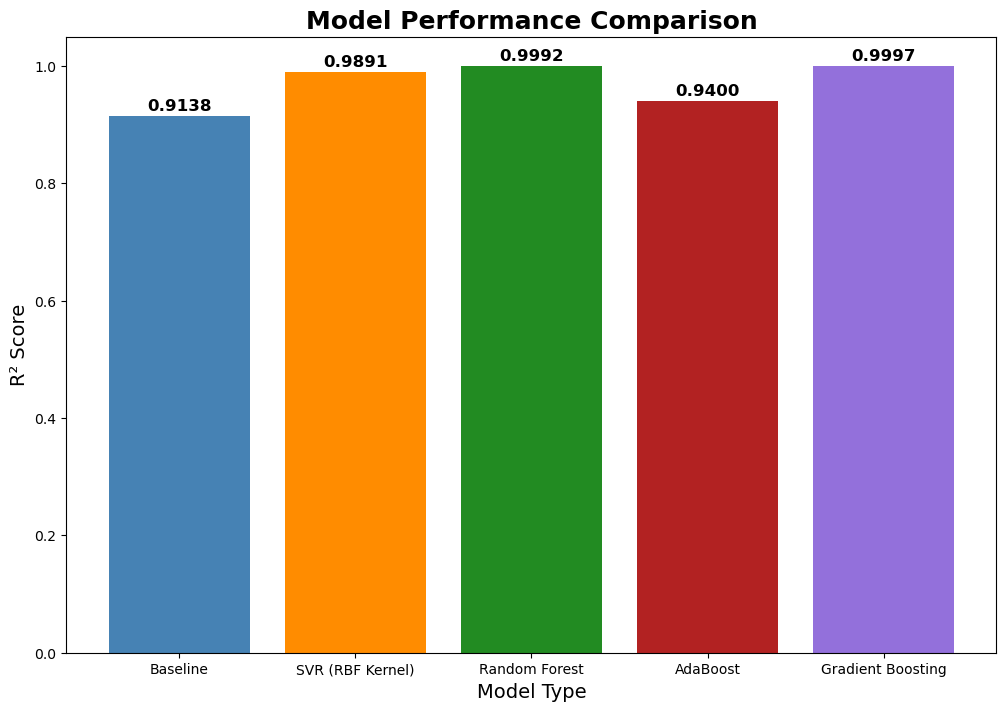

In [ ]:
#All Model Names
models = ['Baseline', 'SVR (RBF Kernel)', 'Random Forest', 'AdaBoost', 'Gradient Boosting']

# Model R² Scores
scores = [r2_Score_scaled, svr_r2, rf_r2, ada_r2, gb_r2]

bar_colors = ['steelblue', 'darkorange', 'forestgreen', 'firebrick', 'mediumpurple']

plt.figure(figsize=(12, 8))
plt.bar(models, scores, color=bar_colors)
plt.title('Model Performance Comparison', fontsize=18, fontweight='bold')
plt.xlabel('Model Type', fontsize=14)
plt.ylabel('R² Score', fontsize=14)

# To display scores on top of each bar
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f"{score:.4f}", ha='center', fontsize=12, fontweight='bold')

plt.show()

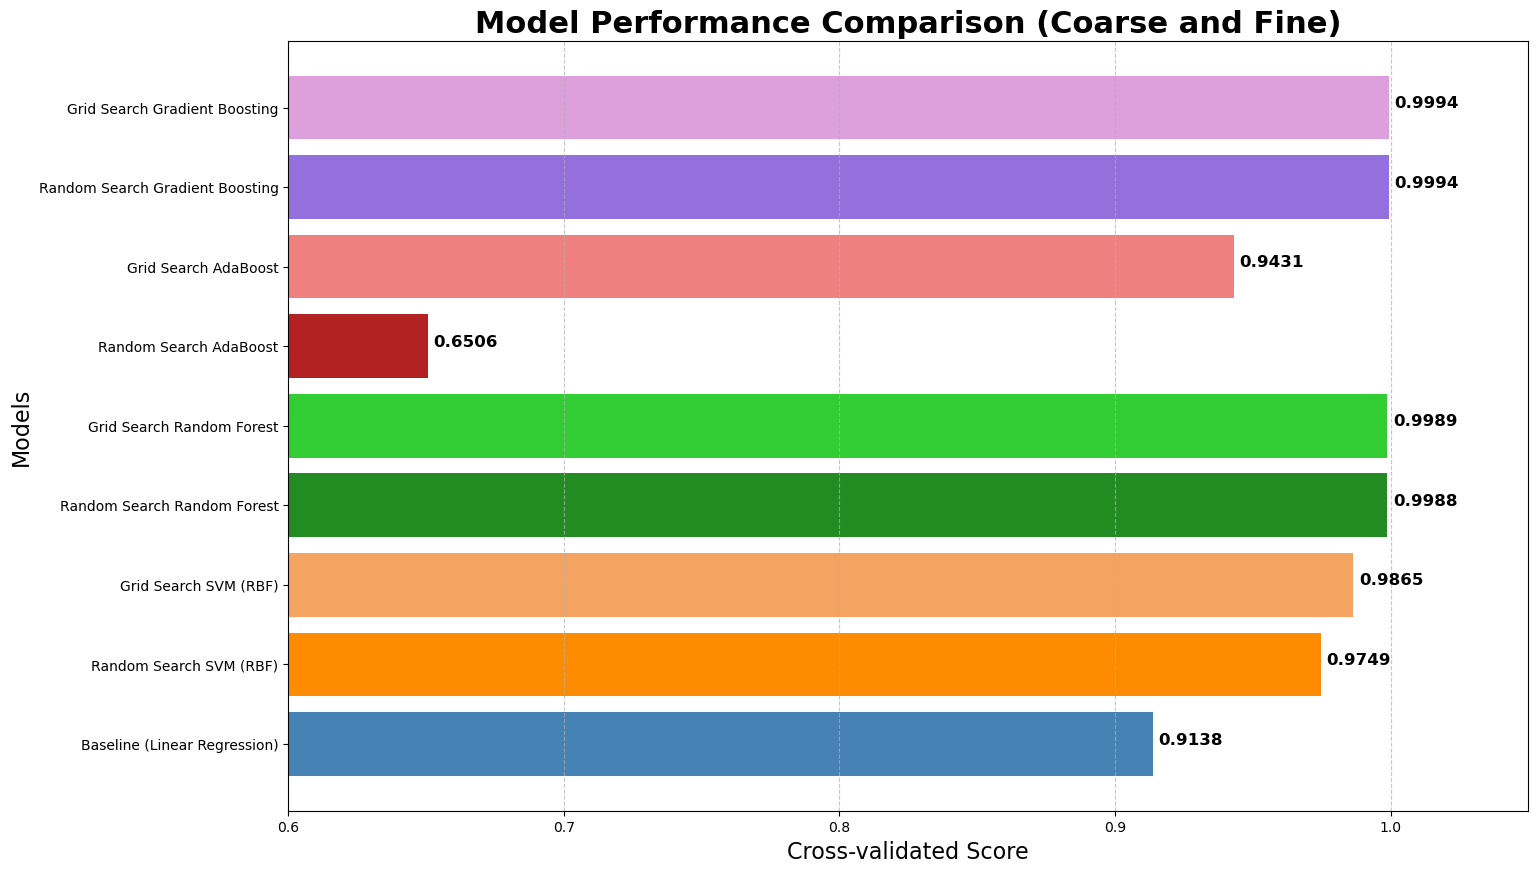

In [ ]:
# All Model Names
models = [
    "Baseline (Linear Regression)",
    "Random Search SVM (RBF)", "Grid Search SVM (RBF)",
    "Random Search Random Forest", "Grid Search Random Forest",
    "Random Search AdaBoost", "Grid Search AdaBoost",
    "Random Search Gradient Boosting", "Grid Search Gradient Boosting"
]

# All Model CV Scores
scores = [
    r2_Score_scaled,  # Baseline (Linear Regression)
    best_score_svm, best_score_fine_svr,  # SVM (RBF)
    best_score_rf, best_score_fine_rf,  # Random Forest
    best_score_ada, best_score_fine_ada,  # AdaBoost
    best_score_coarse_gb, best_score_fine_gb  # Gradient Boosting
]

bar_colors = [
    'steelblue',  # Baseline
    'darkorange', 'sandybrown',  # SVM (RBF)
    'forestgreen', 'limegreen',  # Random Forest
    'firebrick', 'lightcoral',  # AdaBoost
    'mediumpurple', 'plum'  # Gradient Boosting
]

plt.figure(figsize=(16, 10))
plt.barh(models, scores, color=bar_colors)
plt.title('Model Performance Comparison (Coarse and Fine)', fontsize=22, fontweight='bold')
plt.xlabel('Cross-validated Score', fontsize=16)
plt.ylabel('Models', fontsize=16)

# To display scores on top of each bar
for i, score in enumerate(scores):
    plt.text(score + 0.002, i, f"{score:.4f}", ha='left', fontsize=12, fontweight='bold')

plt.xlim(0.6, 1.05)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
